# Unit 5 - Financial Planning

In [112]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [113]:
# Load .env enviroment variables
load_dotenv('API.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [114]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [115]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [116]:
import json
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_response
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

In [117]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

In [118]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_btc * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68727.43
The current value of your 5.3 ETH is $4833.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [119]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [120]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
api_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2")

In [121]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-09-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
crypto_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    end = today,
    limit = 1000
).df
# Preview DataFrame
crypto_portfolio.tail()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.190  3348036   
2021-09-16 00:00:00-04:00  115.95  116.1100  115.9050  115.990  3673608   
2021-09-17 00:00:00-04:00  115.80  115.8750  115.7428  115.850  4662040   
2021-09-20 00:00:00-04:00  116.02  116.1700  115.9750  116.120  4463038   
2021-09-21 00:00:00-04:00  116.13  116.1700  116.0450  116.135  4455403   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2021-09-15 00:00:00-04:00  444.62  448.41  443.44  447.87   69265024  
2021-09-16 00:00:00-04:00  447.32  448.36  444.02  447.14   69354318  
2021-09-17 00:00:00-04:00  444.92  445.37  441.02  441.41  100861596  
2021-09-20 00:00:00-04:00  434.88  436.56  428.86  434.07  149948277  
2021-09-21 00:00:00-04:00  436.53  437.91  433.07  433.67   82418070

In [122]:
# Pick AGG and SPY close prices
#for ticker in tickers:
#crypto_portfolio[ticker] = df_ticker[ticker]['close']
agg_close_price = crypto_portfolio['AGG']['close'][999]
spy_close_price = crypto_portfolio['SPY']['close'][999]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $116.14
Current SPY closing price: $433.67


In [123]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21683.50
The current value of your 200 AGG shares is $23227.00


### Savings Health Analysis

In [124]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
savings_data = {
    'amount': [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
}

tickers_crypto_share = ['crypto', 'shares']
# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=tickers_crypto_share)
# Display savings DataFrame
display(df_savings)

,amount
crypto,73560.585782
shares,44910.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

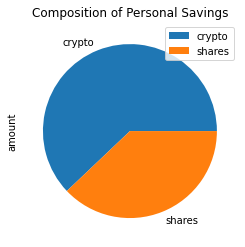

In [125]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [126]:
# Set ideal emergency fund 
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = df_savings['amount']['crypto'] + df_savings['amount']['shares']

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached the financial goal.')
elif total_savings < emergency_funds:
    print(f'Unfortunatley you are {emergancy_funds - total_savings} away from the finacial goal.')

Congratulations! You have enough money in emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [127]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [128]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [129]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation=500,
    num_trading_days=252*30
)

In [130]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [131]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003636,1.000749,1.001841,0.992140,1.003450,0.998962,0.987060,0.995496,1.004740,1.005056,...,0.996362,1.007743,1.008368,0.990518,0.994688,1.002821,0.998426,0.997075,0.991524,0.999352
2,1.006961,1.004494,1.004392,0.990872,1.002883,1.000729,0.989154,0.985353,1.010833,1.007667,...,1.001634,1.015069,1.012177,0.996637,1.001423,1.002539,1.009796,0.997760,0.990843,0.998544
3,1.009777,0.999933,1.005246,0.995023,0.999228,0.999264,0.984696,0.983955,1.015268,1.004677,...,1.005208,1.013921,1.012109,0.985282,1.010996,1.010909,1.008444,0.996915,0.997791,0.993796
4,1.014265,0.993469,1.010228,0.984966,1.002365,1.000437,0.984247,0.978792,1.019100,0.998042,...,1.008782,1.002739,1.014737,0.988678,1.005769,1.012797,1.002040,0.993763,0.997915,1.001523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.073325,5.317416,21.473661,7.955776,7.522970,4.451573,5.265817,5.610412,14.399334,3.594944,...,8.779160,13.008281,12.999929,4.868027,11.325554,7.708065,13.486322,9.923533,10.886907,8.619892
7557,7.138649,5.295004,21.426471,7.903004,7.530625,4.457936,5.302691,5.634319,14.386293,3.569470,...,8.770885,13.039079,12.992662,4.866794,11.389512,7.702724,13.547596,9.887291,10.996616,8.673969
7558,7.194378,5.258380,21.459955,7.904697,7.466762,4.470541,5.336219,5.605848,14.335203,3.527319,...,8.802625,13.108703,12.834728,4.852447,11.311725,7.691275,13.545983,9.983034,10.986898,8.726652
7559,7.203127,5.273816,21.704200,7.892705,7.533771,4.489590,5.317218,5.612127,14.293483,3.513173,...,8.751862,12.995385,12.805143,4.842227,11.239264,7.651918,13.518888,9.992235,11.000702,8.727697


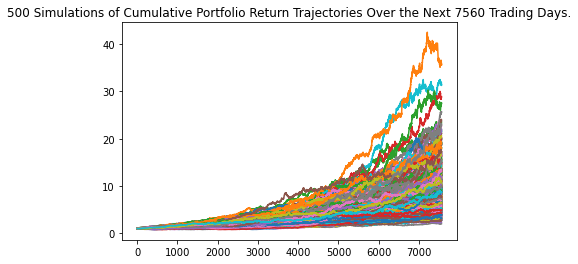

In [132]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

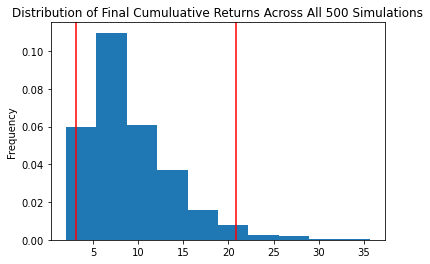

In [133]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [134]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              9.118292
std               4.741444
min               1.982844
25%               5.811323
50%               7.939613
75%              11.333130
max              35.707152
95% CI Lower      3.121001
95% CI Upper     20.878675
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [135]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62420.02 and $417573.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [136]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $93630.04 and $626360.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [137]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation=500,
    num_trading_days=252*5
)

In [138]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996311,0.998593,1.002690,0.995881,1.001954,0.990399,0.993765,0.988915,0.997581,1.003081,...,1.001561,0.996229,0.999696,0.998407,1.000684,1.002812,0.994998,0.999049,0.989172,1.002782
2,1.000317,0.996340,1.007394,1.000856,1.006222,0.988986,0.990490,0.996508,0.996602,1.003524,...,0.997739,0.994603,1.004241,1.009873,1.007213,1.002367,0.995023,1.001848,0.988667,1.004097
3,1.001375,1.008332,1.019353,0.996197,1.009073,0.983731,0.991213,1.000435,0.994910,0.992366,...,0.994438,1.005460,1.004472,1.015535,1.009237,0.999637,0.989520,0.999246,0.992075,1.005960
4,1.001696,0.998178,1.012931,0.993223,1.008869,0.978581,0.994483,1.003679,0.987708,0.992638,...,0.991435,1.010175,1.010560,1.017551,1.014249,0.998805,0.992527,0.993289,0.989492,1.010045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.350579,1.282973,1.266754,0.937847,1.429088,1.085400,1.196333,1.246531,1.583814,1.430902,...,1.688648,1.548438,1.918165,1.494084,1.861867,1.968573,1.590273,1.122108,1.509202,1.553603
1257,1.339866,1.297884,1.258703,0.931288,1.439890,1.084710,1.210352,1.241219,1.592108,1.436030,...,1.690374,1.549485,1.918300,1.498172,1.863071,1.963886,1.592231,1.116826,1.506460,1.556063
1258,1.353480,1.299758,1.254234,0.925798,1.432500,1.088055,1.218372,1.229685,1.587053,1.428693,...,1.687758,1.549555,1.909862,1.502619,1.862150,1.964279,1.601703,1.112326,1.507720,1.564818
1259,1.355669,1.286951,1.258875,0.917937,1.422744,1.081109,1.229895,1.227125,1.589523,1.418953,...,1.682475,1.544591,1.919514,1.505341,1.839762,1.976954,1.608504,1.108977,1.499083,1.574135


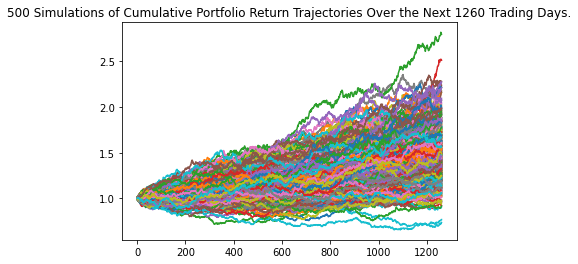

In [139]:
# Plot simulation outcomes
line_plot_fy = MC_fiveyears.plot_simulation()

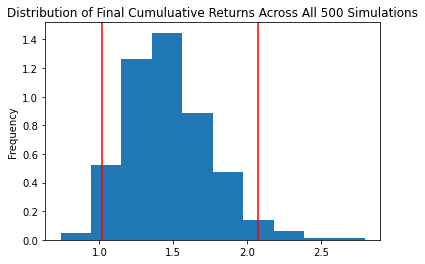

In [140]:
# Plot probability distribution and confidence intervals
dist_plot_fy = MC_fiveyears.plot_distribution()

In [141]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fy = MC_fiveyears.summarize_cumulative_return()
# Print summary statistics
print(tbl_fy)

count           500.000000
mean              1.461632
std               0.280473
min               0.736524
25%               1.262192
50%               1.423635
75%               1.628535
max               2.796148
95% CI Lower      1.017716
95% CI Upper      2.074486
Name: 1260, dtype: float64


In [142]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $62420.02 and $417573.51


### Ten Years Retirement Option

In [143]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation=500,
    num_trading_days=252*10
)

In [144]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996132,0.999109,0.998319,0.997587,1.007459,1.001004,1.004465,0.991949,1.010268,1.001579,...,1.002261,0.998704,0.995345,0.994321,1.008605,0.993301,1.004830,1.005685,1.002536,0.992315
2,0.984727,0.992574,0.995632,0.998115,1.013322,1.006444,1.003677,0.996729,1.001830,1.001426,...,0.993907,0.995472,0.990834,0.999063,1.021199,0.986958,1.010966,0.992603,1.005459,0.982134
3,0.985244,0.997080,0.992109,0.999085,1.009028,1.015998,1.004251,0.990827,1.004559,1.008523,...,0.988296,0.995889,0.988143,0.998541,1.017171,0.988850,1.003968,1.000227,1.010106,0.988477
4,0.990072,1.003123,0.990823,1.008656,1.009194,1.008733,1.007934,0.990859,1.011776,1.012012,...,0.984182,0.992906,0.988465,0.997392,1.020230,0.986364,0.992487,0.996327,1.008439,0.989924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.406045,1.729502,2.294298,1.414431,2.125590,1.873090,2.442411,1.499493,1.314440,2.219985,...,2.187202,2.731953,1.063122,3.420632,1.709508,2.369357,1.665189,1.655718,2.208421,1.936993
2517,2.418978,1.723906,2.310449,1.416373,2.112323,1.870803,2.459770,1.495096,1.320315,2.238049,...,2.183964,2.750586,1.059302,3.416498,1.705929,2.355710,1.659714,1.649698,2.224293,1.938475
2518,2.407065,1.745665,2.315901,1.409766,2.097435,1.866886,2.455860,1.490656,1.307620,2.226213,...,2.176882,2.754848,1.075601,3.451584,1.710533,2.366794,1.652337,1.658190,2.216706,1.953047
2519,2.418350,1.746526,2.319971,1.421388,2.089318,1.855388,2.448352,1.484962,1.306877,2.223077,...,2.185782,2.755085,1.067796,3.441292,1.704598,2.361690,1.664314,1.671989,2.205978,1.960443


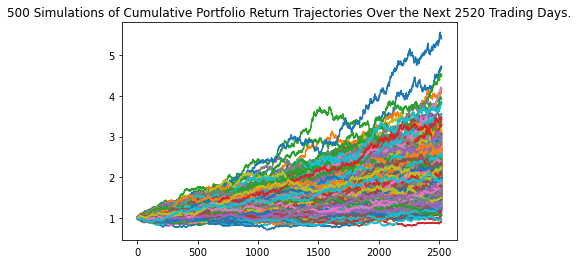

In [145]:
# Plot simulation outcomes
line_plot_ty = MC_tenyears.plot_simulation()

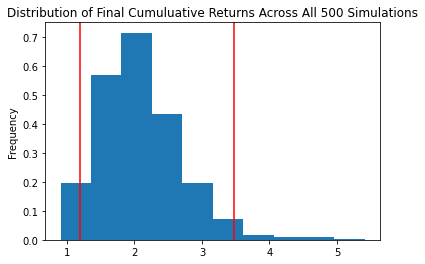

In [146]:
# Plot probability distribution and confidence intervals
dist_plot_ty = MC_tenyears.plot_distribution()

In [147]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ty = MC_tenyears.summarize_cumulative_return()
# Print summary statistics
print(tbl_ty)

count           500.000000
mean              2.095324
std               0.612710
min               0.905207
25%               1.678367
50%               2.023693
75%               2.410516
max               5.412612
95% CI Lower      1.193928
95% CI Upper      3.475999
Name: 2520, dtype: float64


In [94]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $65618.92 and $386098.56
